# 아마존 제품 리뷰 TDM

Amazon 사용자들이 올린 제품 리뷰를 TDM으로 만들어보자. UCI 머신러닝 리포지토리에서에서 Sentiment Labelled Sentences 데이터를 다운받아 'amazon_cells_labelled.txt'를 사용한다.

https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

## 파일 다운로드

In [1]:
import requests
res = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')

In [2]:
with open('sentiment labelled sentences.zip', 'wb') as f:
    f.write(res.content)

## 압축 파일 열기

압축 파일에서 `amazon_cells_labelled.txt` 파일을 연다.

In [1]:
from zipfile import ZipFile

In [2]:
z = ZipFile('sentiment labelled sentences.zip')

In [3]:
data = z.open('sentiment labelled sentences/amazon_cells_labelled.txt')

## 자료 불러오기

아마존 제품 리뷰 자료는 한줄 댓글과 함께 해당 제품에 대한 긍/부정 점수가 1과 0으로 기록되어 있다. 따라서 긍/부정 감정사전을 만드는데 용이하다.

이 자료는 탭으로 구분이 이뤄져있으며, 열마다 제목이 없기 때문에 파일을 읽을 때 `sep="\t"` 옵션과 `header=None` 옵션을 넘겨줘야 한다.

In [4]:
import pandas as pd  

In [5]:
df = pd.read_csv(data, sep="\t", header=None)

자료를 확인해보니, 댓글이 첫번째 열에 들어있으며 감정 분류가 두번째 열에 들어가있다.

In [6]:
df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [7]:
content = df[0]
sentiment = df[1]

## TDM 만들기

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

먼저 `CountVectorizer`를 생성한다. 여러 가지 옵션을 설정할 수 있는데, 여기서는 `max_features=500`으로 설정한다. 이 옵션은 TDM에서 포함시킬 최대(max)의 단어(feature) 수를 말한다. 즉, 빈도 순으로 최대 500 단어까지만 포함시킨다. `stop_words=`는 분석에서 제외할 불용어를 설정하는 옵션이다. `stop_words=english`로 설정하면 영어의 관사, 전치사 등을 자동으로 제외시킨다. 한국어는 지원하지 않기 때문에 한국어를 분석할 때는 `tokenizer=` 옵션에 형태소 분석 함수를 넘겨줘야 한다.

In [9]:
cv = CountVectorizer(max_features=500, stop_words='english')

In [10]:
tdm = cv.fit_transform(content)

tdm의 형태가 1000행, 500열이 된다. (글의 수가 1000개, 단어의 종류가 500종)

In [11]:
tdm.shape

(1000, 500)

## 단어 목록

In [12]:
cv.get_feature_names()[:10]

['10',
 '510',
 'able',
 'absolutely',
 'access',
 'accidentally',
 'actually',
 'additional',
 'adorable',
 'advertised']

## 단어별 총 빈도

In [13]:
import numpy as np

In [14]:
tdm.sum(axis=0)  # 단어별 총빈도

matrix([[  4,   3,   4,   4,   2,   2,   4,   2,   2,   2,   2,   4,   2,
           2,   9,   2,   3,   5,   7,   3,   4,   5,   4,  14,   4,   4,
           2,   2,  46,   3,   3,   5,  23,  19,   2,   7,   2,   6,   2,
           4,  18,   2,   2,  17,   2,   3,   2,   2,   8,   2,   3,   2,
           8,  19,   2,   4,   2,   6,  13,   6,  13,  18,   3,  29,   5,
          14,  14,   3,  19,   3,   5,   5,   9,   3,   4,   5,  12,   4,
           5,   4,   3,  17,   4,   7,   7,   3,   5,   3,   3,   3,   9,
          10,   5,   3,   6,   9,   5,   4,   9,   3,   4,   4,   3,   5,
           3,  11,   3,  13,  16,   7,   5,   6,  10,   5,   5,   3,  26,
          16,  28,   3,   3,   3,   7,   3,  35,   3,   4,   3,   6,   3,
           4,   5,  18,   6,   5,  27,   2,   2,   5,   4,   3,   3,   2,
           2,   4,   3,   4,   3,   2,   3,   4,   3,  13,   4,   5,   3,
           3,   5,   2,   2,   2,   3,  13,  12,  11,   2,   2,   2,   2,
           3,   2,   3,   2,   3,   5,

In [15]:
tdm.sum(axis=1)  # 문서별 총 단어 수 

matrix([[ 3],
        [ 4],
        [ 2],
        [ 5],
        [ 2],
        [ 5],
        [ 2],
        [ 1],
        [ 2],
        [ 3],
        [ 3],
        [ 6],
        [ 4],
        [ 2],
        [ 4],
        [ 4],
        [ 1],
        [ 2],
        [ 2],
        [ 4],
        [ 3],
        [ 3],
        [ 0],
        [ 6],
        [ 3],
        [ 4],
        [ 8],
        [ 5],
        [ 5],
        [ 3],
        [ 4],
        [ 4],
        [ 1],
        [ 4],
        [ 7],
        [ 8],
        [ 1],
        [ 4],
        [ 4],
        [ 2],
        [ 8],
        [ 2],
        [ 4],
        [ 2],
        [ 3],
        [ 2],
        [ 3],
        [ 7],
        [ 1],
        [ 2],
        [ 4],
        [ 5],
        [ 5],
        [ 6],
        [ 2],
        [ 2],
        [ 1],
        [ 5],
        [ 6],
        [ 2],
        [ 3],
        [ 5],
        [ 8],
        [ 3],
        [ 3],
        [ 7],
        [ 2],
        [ 7],
        [ 1],
        [ 2],
        [ 3],
      

In [16]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

빈도 내림차순 정렬

In [17]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
315,phone,168
189,great,99
185,good,77
338,product,55
343,quality,49


## 단어 구름

`wordcloud` 패키지 설치. 아나콘다를 이용할 경우 아래와 같이 설치한다.

In [ ]:
!conda install -y -c conda-forge wordcloud 

맥이나 리눅스에서는 다음과 같이 설치한다.

In [ ]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud

In [19]:
wc = WordCloud(background_color='white', width=400, height=300)

In [20]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [21]:
cloud = wc.fit_words(count_dic)

In [22]:
cloud.to_file('cloud.png')

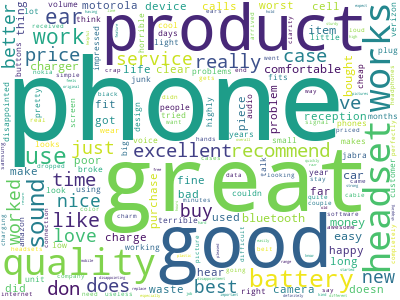

In [23]:
cloud.to_image()

## TF-IDF

- TF: Term-Frequency 단어 빈도
- IDF: Inverse Document Frequency

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(stop_words='english', 
                        lowercase=True,
                        max_features=500)

In [26]:
tdm = tfidf.fit_transform(content)

In [27]:
tdm

<1000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3445 stored elements in Compressed Sparse Row format>

In [28]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [29]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
315,phone,52.527405
189,great,42.943438
185,good,31.020654
338,product,25.804339
493,works,23.866009


## 한국어 TDM

### Naver Sentiment Movie Corpus 다운로드

In [38]:
import requests

In [39]:
res = requests.get('https://github.com/e9t/nsmc/raw/master/ratings_train.txt')

In [40]:
with open('nsmc_train.csv', 'wb') as f:
    f.write(res.content)

In [41]:
nsmc = pd.read_csv('nsmc_train.csv', sep='\t')

In [42]:
nsmc.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 토큰화 함수

In [30]:
import stanfordnlp

In [31]:
nlp = stanfordnlp.Pipeline(lang='ko', treebank='ko_gsd')

Use device: cpu
---
Loading: tokenize
With settings:
{'model_path': 'C:\\Users\\user\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd_tokenizer.pt', 'lang': 'ko', 'shorthand': 'ko_gsd', 'mode': 'predict'}
---
Loading: pos
With settings:
{'model_path': 'C:\\Users\\user\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd_tagger.pt', 'pretrain_path': 'C:\\Users\\user\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd.pretrain.pt', 'lang': 'ko', 'shorthand': 'ko_gsd', 'mode': 'predict'}
---
Loading: lemma
With settings:
{'model_path': 'C:\\Users\\user\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd_lemmatizer.pt', 'lang': 'ko', 'shorthand': 'ko_gsd', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings:
{'model_path': 'C:\\Users\\user\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd_parser.pt', 'pretrain_path': 'C:\\Users\\user\\stanfordn

In [59]:
def extract_nouns(text):
    doc = nlp(text)
    nouns = []
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma = word.lemma.split('+')
            xpos = word.xpos.split('+')
            for lem, pos in zip(lemma, xpos):
                if pos.startswith('N') and (len(lem) > 1 or lem == '돈'):
                    yield lem


In [60]:
nsmc.loc[0, 'document']

'아 더빙.. 진짜 짜증나네요 목소리'

In [61]:
list(extract_nouns(nsmc.loc[0, 'document']))

['더빙', '진짜', '목소리']

In [62]:
cv = CountVectorizer(max_features=500, tokenizer=extract_nouns)

In [63]:
tdm = cv.fit_transform(nsmc.loc[0:100, 'document'])

In [64]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

C:\Users\eupho\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [65]:
word_count.sort_values('빈도', ascending=False).head(10)

,단어,빈도
215,영화,17
210,연기,7
224,완전,5
306,진짜,5
246,이건,4
337,평점,4
153,사람,4
318,최고,4
65,내용,4
15,갈등-,3


### 한글 글꼴

나눔 손글씨 글꼴을 다운로드 받는다. 다른 글꼴 파일(.ttf)를 사용해도 무방하다.

In [68]:
import requests

In [69]:
res = requests.get('https://hangeul.naver.com/webfont/NanumBrush/NanumPen.ttf')
with open('NanumPen.ttf', 'wb') as f:
    f.write(res.content)

In [70]:
wc = WordCloud(background_color='white',
               width=400, height=300, 
               font_path='NanumPen.ttf')

In [71]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [72]:
cloud = wc.fit_words(count_dic)

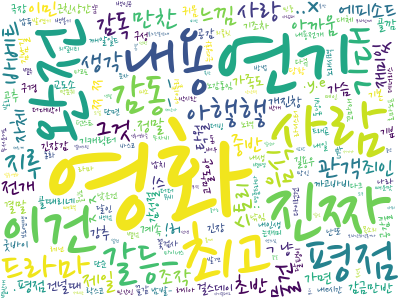

In [73]:
cloud.to_image()

## 준단어 토큰화

- 단어
- 준단어(subword): 기본적으로는 글자 단위, 자주 나오는 조합은 하나로
- 글자

In [74]:
!pip install sentencepiece

In [75]:
with open('review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(content))

In [76]:
from sentencepiece import SentencePieceTrainer

In [77]:
SentencePieceTrainer.Train('--input=review.txt --model_prefix=amazon_review --vocab_size=500')

True

In [79]:
import csv

In [80]:
tokens = pd.read_csv('amazon_review.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)

In [81]:
tokens.head(10)

,0,1
0,<unk>,0.00000
1,<s>,0.00000
2,</s>,0.00000
3,▁,-2.58317
4,.,-2.99945
5,s,-3.20645
6,t,-3.70935
7,▁the,-3.82268
8,e,-3.84017
9,▁I,-4.02138


In [82]:
from sentencepiece import SentencePieceProcessor

In [83]:
sp = SentencePieceProcessor()
sp.Load("amazon_review.model")

True

In [84]:
content[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [67]:
sp.encode_as_pieces(content[0])

['▁So',
 '▁the',
 're',
 '▁is',
 '▁no',
 '▁',
 'way',
 '▁for',
 '▁me',
 '▁to',
 '▁plug',
 '▁it',
 '▁in',
 '▁',
 'h',
 'er',
 'e',
 '▁in',
 '▁the',
 '▁',
 'U',
 'S',
 '▁',
 'un',
 'less',
 '▁I',
 '▁go',
 '▁b',
 'y',
 '▁a',
 '▁con',
 've',
 'r',
 'ter',
 '.']

In [85]:
cv = CountVectorizer(max_features=500, tokenizer=sp.encode_as_pieces)

In [86]:
tdm = cv.fit_transform(content)

In [87]:
pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending=False)

C:\Users\eupho\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
163,▁,1281
15,.,1079
137,s,820
396,▁the,588
140,t,502
60,e,411
292,▁i,397
161,y,345
41,and,329
296,▁it,324


In [69]:
sp.encode_as_ids(content[0])

[312,
 7,
 47,
 18,
 135,
 3,
 223,
 32,
 106,
 22,
 269,
 19,
 34,
 3,
 499,
 37,
 8,
 34,
 7,
 3,
 159,
 142,
 3,
 103,
 161,
 9,
 278,
 58,
 10,
 15,
 224,
 78,
 25,
 80,
 4]

## 실습: 한국어 데이터를 준단어 토큰화하여 TDM으로 만들어봅시다.

In [103]:
nsmc = pd.read_csv('nsmc_train.csv', sep='\t')

content = nsmc.loc[:2000, 'document'].dropna()
with open('nsmc.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(content))

SentencePieceTrainer.Train('--input=nsmc.txt --model_prefix=nsmc --vocab_size=3000')

sp = SentencePieceProcessor()
sp.Load("nsmc.model")

def tokenizer(text):
    tokens = sp.encode_as_pieces(text)
    return [t for t in tokens if len(t) > 1]

cv = CountVectorizer(max_features=1000, tokenizer=tokenizer)
tdm = cv.fit_transform(content)
count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})
count.sort_values('빈도', ascending=False).head(20)

C:\Users\eupho\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
8,..,409
456,▁영화,382
9,...,353
490,▁이,172
876,영화,120
561,▁정말,117
967,하고,116
155,▁너무,108
888,으로,99
599,▁진짜,94


## 의존성 분석

In [ ]:
!pip install tqdm

In [32]:
import tqdm

In [33]:
from collections import Counter

In [34]:
doc = nlp('나는 오늘 맛있는 밥을 먹었다.')

In [35]:
doc.sentences[0].words

[<Word index=1;text=나는;lemma=나+는;upos=PRON;xpos=VV+ETM;feats=_;governor=5;dependency_relation=nsubj>,
 <Word index=2;text=오늘;lemma=오늘;upos=NOUN;xpos=NNG;feats=_;governor=5;dependency_relation=nmod>,
 <Word index=3;text=맛있는;lemma=맛있+는;upos=ADJ;xpos=VA+ETM;feats=_;governor=4;dependency_relation=amod>,
 <Word index=4;text=밥을;lemma=밥+을;upos=NOUN;xpos=NNG+JKO;feats=_;governor=5;dependency_relation=obj>,
 <Word index=5;text=먹었다;lemma=먹+었+다;upos=VERB;xpos=VV+EP+EF;feats=_;governor=0;dependency_relation=root>,
 <Word index=6;text=.;lemma=.;upos=PUNCT;xpos=SF;feats=_;governor=5;dependency_relation=punct>]

In [113]:
count = Counter()

In [114]:
count['a'] += 1

In [115]:
count

Counter({'a': 1})

In [43]:
dependencies = Counter()

for text in tqdm.tqdm_notebook(nsmc.loc[:99, 'document']):
    doc = nlp(text)
    for sentence in doc.sentences:
        for word in sentence.words:
            if not word.governor:
                continue

            i = word.governor - 1
            if sentence.words[i].xpos.startswith('V'):
                gov = sentence.words[i].lemma.split('+')[0]
                dep = word.lemma.split('+')[0]
                dependencies[(dep, gov)] += 1

In [44]:
dep_df = pd.DataFrame(dependencies.items(), columns=['의존관계', '빈도'])

In [45]:
dep_df.sort_values('빈도', ascending=False).head(5)

,의존관계,빈도
71,"(절대, 아니)",3
22,"(?, 있)",2
184,"(제일, 멋지)",2
145,"(., 하)",2
38,"(진짜, 보)",2
